In [1]:
import pandas as pd
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

## Some EDA

In [2]:
df = pd.read_csv('IMDB Dataset.csv')

In [3]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
# Check for balanced dataset
df['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [5]:
# Negative example
df['review'][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [6]:
# Positive example
df['review'][9]

'If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom liked it.<br /><br />Great Camp!!!'

## Pre-processing: Tokenize, Stopwords, Lemmatize, etc.

#### ~~Encode the labels~~

In [7]:
# le = LabelEncoder()

In [8]:
# df['enc_sent'] = le.fit_transform(df['sentiment']) # pos = 1, neg = 0

In [9]:
# df.head()

#### Remove html coding

In [10]:
df['review'] = df['review'].str.replace('<.*?>','')

#### Remove all puncuation and symbols

In [11]:
df['review'] = df['review'].str.replace('[^\w\s]','')

#### Make everything lower case

In [12]:
df['review'] = df['review'].str.lower()

#### Remove stop words

In [13]:
import spacy
sp = spacy.load('en_core_web_sm')
all_stopwords = sp.Defaults.stop_words
# # After seeing the word counts, update stop words
sp.Defaults.stop_words |= {'movie', 'film', 'like'}

In [14]:
df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (all_stopwords)]))

#### Tokenize

In [15]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [16]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [17]:
df['lemma_review'] = df.review.apply(lemmatize_text)

In [18]:
df['review'][0]

'reviewers mentioned watching 1 oz episode youll hooked right exactly happened methe thing struck oz brutality unflinching scenes violence set right word trust faint hearted timid pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements far awayi main appeal fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess episode saw struck nasty surreal couldnt ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order away mannered middle class inmates turned prison bitches lack street skills prison experience watchi

In [19]:
print(df['lemma_review'][0])

['reviewer', 'mentioned', 'watching', '1', 'oz', 'episode', 'youll', 'hooked', 'right', 'exactly', 'happened', 'methe', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scene', 'violence', 'set', 'right', 'word', 'trust', 'faint', 'hearted', 'timid', 'pull', 'punch', 'regard', 'drug', 'sex', 'violence', 'hardcore', 'classic', 'use', 'wordit', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focus', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'manyaryans', 'muslim', 'gangsta', 'latino', 'christian', 'italian', 'irish', 'moreso', 'scuffle', 'death', 'stare', 'dodgy', 'dealing', 'shady', 'agreement', 'far', 'awayi', 'main', 'appeal', 'fact', 'go', 'show', 'wouldnt', 'dare', 'forget', 'pretty', 'picture', 'painted', 'mainstream', 'audience', 'forget', 'charm', 'forget', 'romanceoz', 'doesnt', 'mess', 'episode', 'saw', 'stru

#### Subset for positive word cloud

In [20]:
pos_df = df[df['sentiment'] == 'positive']

#### ~~Tokenize (with tensorflow)~~

In [21]:
# tokenizer = Tokenizer(oov_token='<OOV>')
# tokenizer.fit_on_texts(df['review'])

In [22]:
# vocab_size = len(tokenizer.word_index) + 1

In [23]:
# encoded_docs = tokenizer.texts_to_sequences(x_train)

In [24]:
# Only keep a page worth of text (500 words)
# padded_sequence = pad_sequences(encoded_docs, maxlen=500)

In [25]:
# Get word counts
cloudcount = dict(pos_df.lemma_review.explode().value_counts())

In [26]:
{k: cloudcount[k] for k in list(cloudcount)[:10]}

{'time': 15177,
 'good': 14409,
 'story': 13638,
 'character': 13629,
 'great': 12690,
 'scene': 9688,
 'life': 9134,
 'love': 8921,
 'people': 8637,
 'way': 8510}

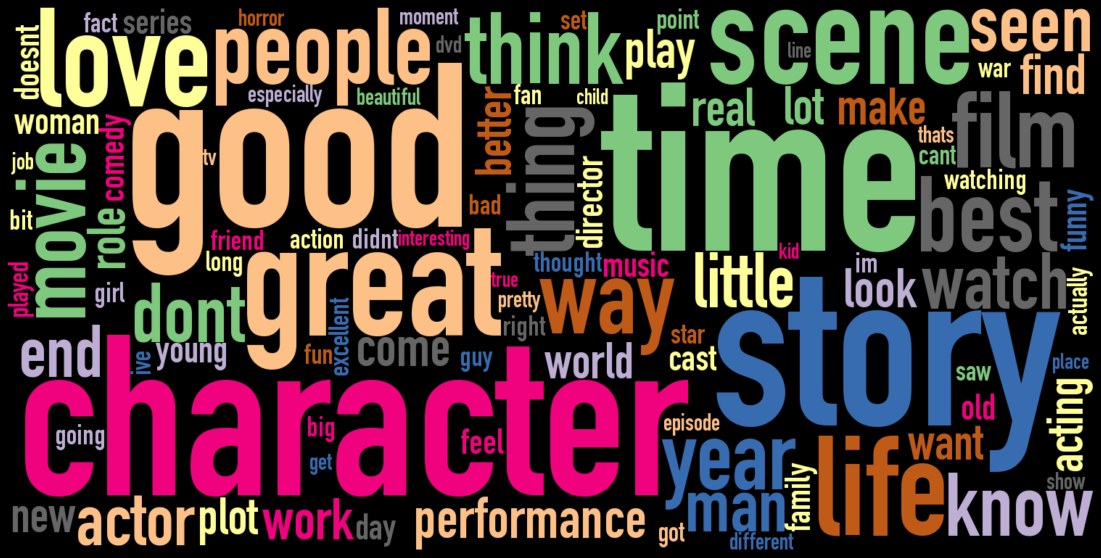

In [28]:
wordcloud = WordCloud(width=1500, height=750, max_words=100, background_color="black", max_font_size=325,
                      colormap='Accent', font_path='/System/Library/Fonts/Supplemental/DIN Condensed Bold.ttf').generate_from_frequencies(cloudcount)
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()